In [3]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [4]:
dataset_path = r"C:\Users\sumit\OneDrive\Desktop\waste-classification\garbage-dataset"
classes = sorted(os.listdir(dataset_path))
print("Classes:", classes)


Classes: ['battery', 'biological', 'cardboard', 'clothes', 'glass', 'metal', 'paper', 'plastic', 'shoes', 'trash']


In [4]:
IMG_SIZE = (64,64)   # smaller size = saves memory
X, y = [], []

for idx, cls in enumerate(classes):
    folder = os.path.join(dataset_path, cls)
    files = os.listdir(folder)[:500]   # limit images per class
    print(f"Loading {cls} ({len(files)} images)...")

    for file in files:
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.resize(img, IMG_SIZE)
        img = img / 255.0
        X.append(img)
        y.append(idx)

X = np.array(X)
y = np.array(y)
print("✅ Dataset loaded successfully:", X.shape, y.shape)


Loading battery (500 images)...
Loading biological (500 images)...
Loading cardboard (500 images)...
Loading clothes (500 images)...
Loading glass (500 images)...
Loading metal (500 images)...
Loading paper (500 images)...
Loading plastic (500 images)...
Loading shoes (500 images)...
Loading trash (500 images)...
✅ Dataset loaded successfully: (5000, 64, 64, 3) (5000,)


In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

y_train = to_categorical(y_train, num_classes=len(classes))
y_val = to_categorical(y_val, num_classes=len(classes))

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)


Train shape: (4000, 64, 64, 3)
Validation shape: (1000, 64, 64, 3)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                ┃ Output Shape        ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)           │ (None, 62, 62, 32)  │         896 │
├─────────────────────────────┼─────────────────────┼─────────────┤
│ max_pooling2d_2             │ (None, 31, 31, 32)  │           0 │
│ (MaxPooling2D)              │                     │             │
├─────────────────────────────┼─────────────────────┼─────────────┤
│ conv2d_3 (Conv2D)           │ (None, 29, 29, 64)  │      18,496 │
├─────────────────────────────┼─────────────────────┼─────────────┤
│ max_pooling2d_3             │ (None, 14, 14, 64)  │           0 │
│ (MaxPooling2D)              │                     │             │
├─────────────────────────────┼─────────────────────┼─────────────┤
│ flatten_1 (Flatten)         │ (None, 12544)       │           0 │
├─────────────────────────────┼─────────────────────┼─────────────┤
│ dense_2 (Dense)             │ (None, 128)         │   1,605,760 │
├─────────────────────────────┼─────────────────────┼─────────────┤
│ dropout_1 (Dropout)         │ (None, 128)         │           0 │
├─────────────────────────────┼─────────────────────┼─────────────┤
│ dense_3 (Dense)             │ (None, 10)          │       1,290 │
└─────────────────────────────┴─────────────────────┴─────────────┘

 Total params: 1,626,442 (6.20 MB)

 Trainable params: 1,626,442 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_val, y_val),
    batch_size=32
)


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - accuracy: 0.2727 - loss: 2.0229 - val_accuracy: 0.4310 - val_loss: 1.7130
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.4572 - loss: 1.6102 - val_accuracy: 0.4760 - val_loss: 1.5435
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - accuracy: 0.5268 - loss: 1.3946 - val_accuracy: 0.5210 - val_loss: 1.4578
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.6037 - loss: 1.1810 - val_accuracy: 0.5290 - val_loss: 1.4454
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 116ms/step - accuracy: 0.6722 - loss: 1.0000 - val_accuracy: 0.5510 - val_loss: 1.4027
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 109ms/step - accuracy: 0.7170 - loss: 0.8541 - val_accuracy: 0.5550 - val_loss: 1.3836
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 118ms/step - accuracy: 0.7585 - loss: 0.7008 - val_accuracy: 0.5420 - val_loss: 1.4911
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.8025 - loss: 0.587

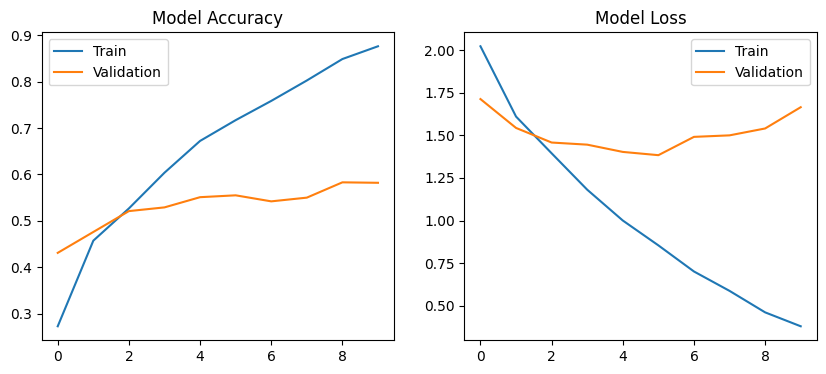

In [10]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.legend()

plt.show()


In [11]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc*100:.2f}%")


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5820 - loss: 1.6652
Validation Accuracy: 58.20%


In [12]:
model.save("waste_classification_cnn_model.h5")
print("Model saved successfully!")


Model saved successfully!


In [1]:
# Week 3 / Improvement Section — Accuracy Enhancement


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)


NameError: name 'X_train' is not defined